## Part 2 Exploration

### Import Libraries

In [150]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from plotnine import *

In [184]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

*First lets generate a dataset. (The plots of Cat/Dog dataset and cancer dataset are not good enough)*

# Part 2: Model Training and Evaluation

In [268]:
random.seed(2)

In [297]:
def generate_two_circle_data(N1, N2, r1, r2, noise):
    # Circle 1
    theta1 = np.random.uniform(0, 2 * np.pi, N1)
    x1 = r1 * np.cos(theta1) + np.random.normal(0, noise, N1)
    x2 = r1 * np.sin(theta1) + np.random.normal(0, noise, N1)
    X1 = np.column_stack((x1, x2))
    y1 = np.zeros(N1)

    # Circle 2
    theta2 = np.random.uniform(0, 2 * np.pi, N2)
    x1 = r2 * np.cos(theta2) + np.random.normal(0, noise, N2)
    x2 = r2 * np.sin(theta2) + np.random.normal(0, noise, N2)
    X2 = np.column_stack((x1, x2))
    y2 = np.ones(N2)

    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))
    return X, y


In [298]:
N1, N2 = 4000, 4000
r1, r2 = 1, 3.5
noise = 1
X, y = generate_two_circle_data(N1, N2, r1, r2, noise)

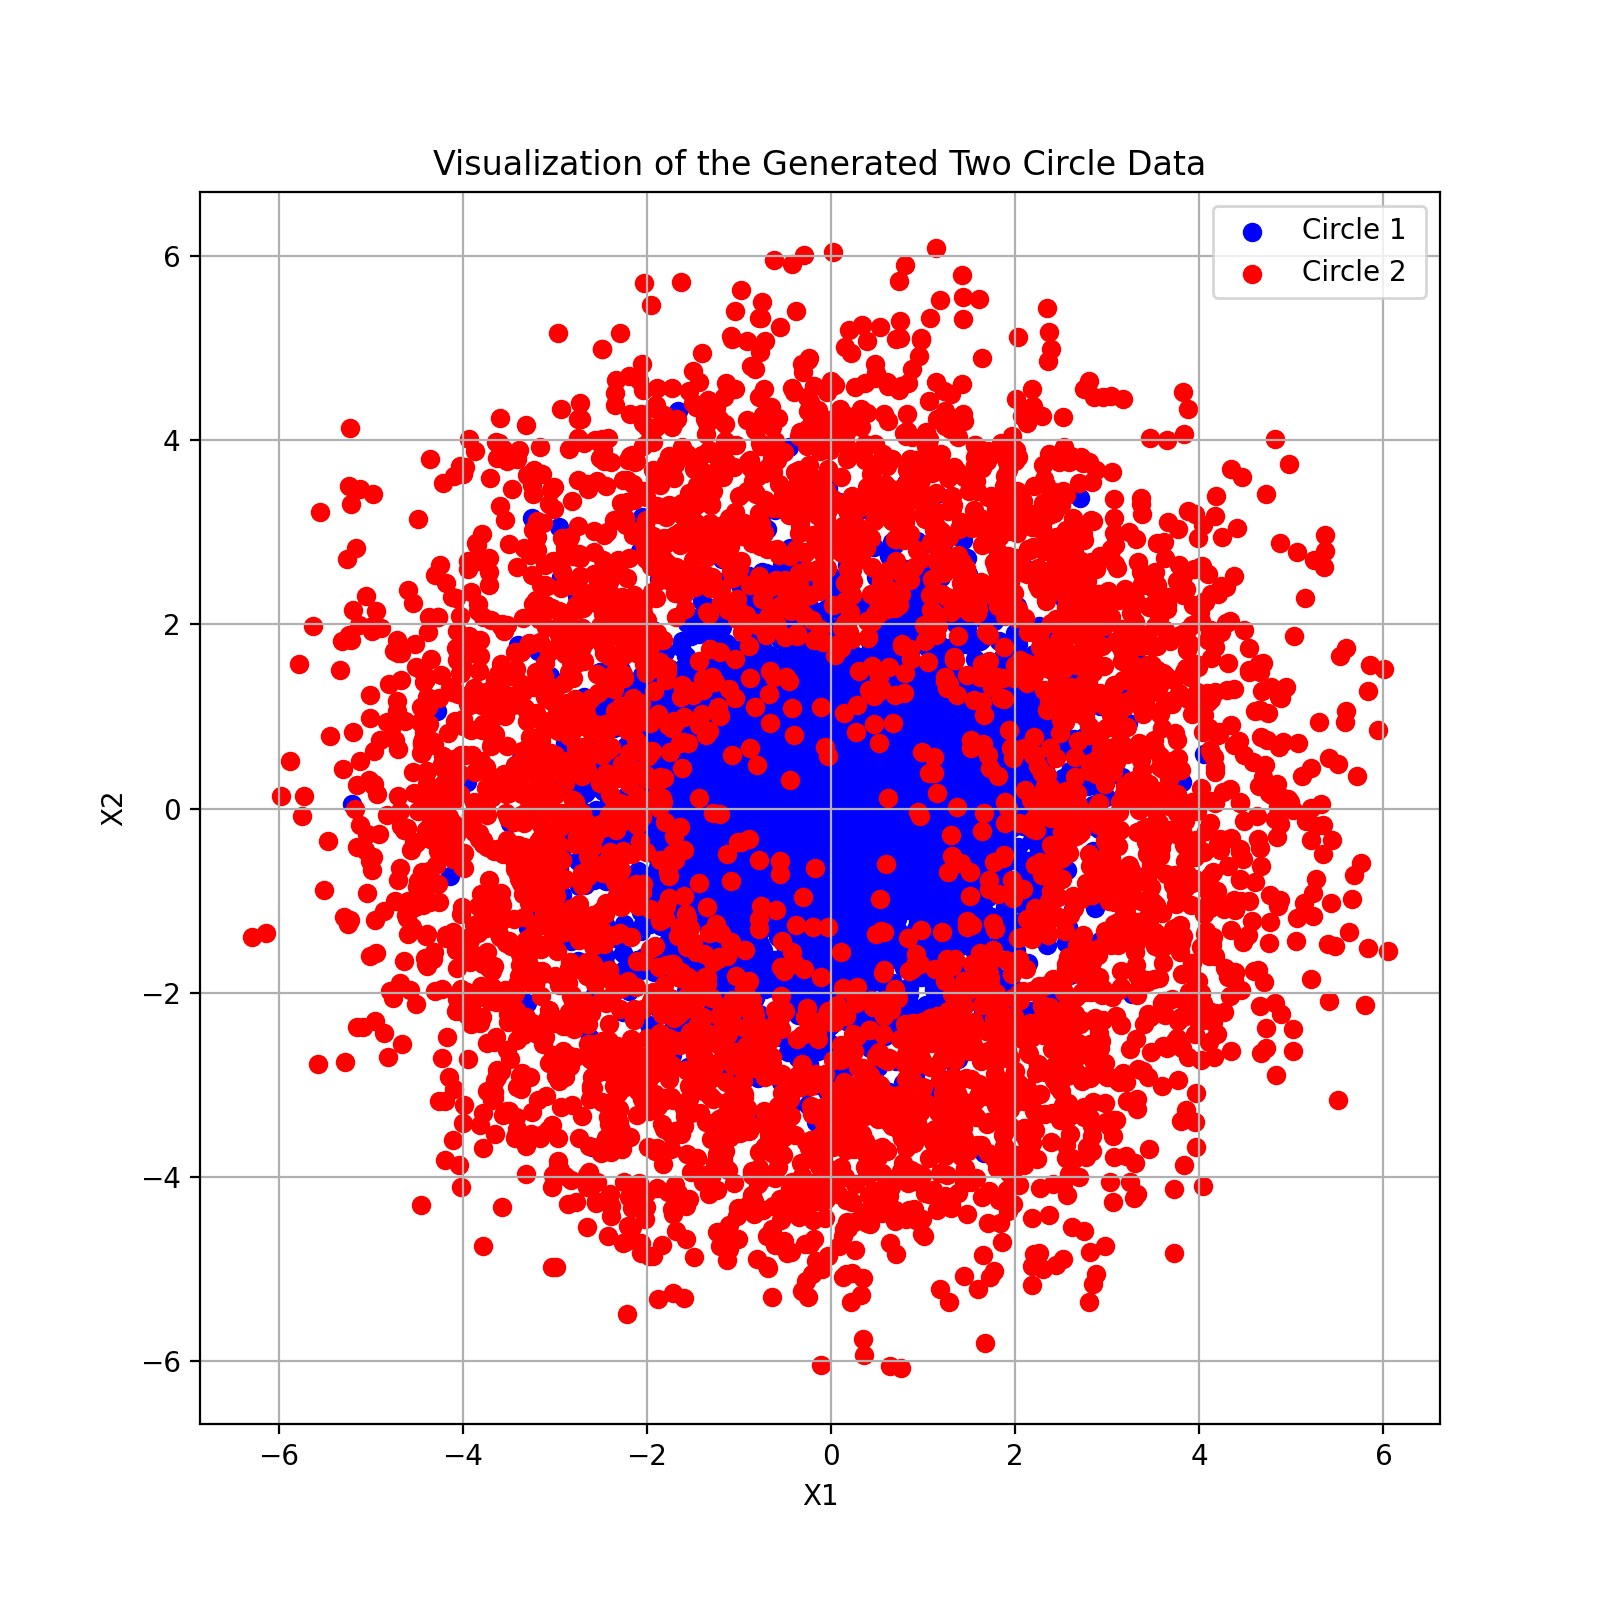

In [299]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Circle 1 ')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Circle 2 ')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualization of the Generated Two Circle Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [305]:
num_trees = [10, 50, 100, 200, 300, 350, 400]
train_accuracies = []
test_accuracies = []

#### First lets explore the number of weak learners

*This is for the ggplot later*

In [309]:
df_ntrees = pd.DataFrame(columns=['type', 'number', 'train_accuracy', 'test_accuracy'])
df_ntrees

,type,number,train_accuracy,test_accuracy


*First the Ada boosting*

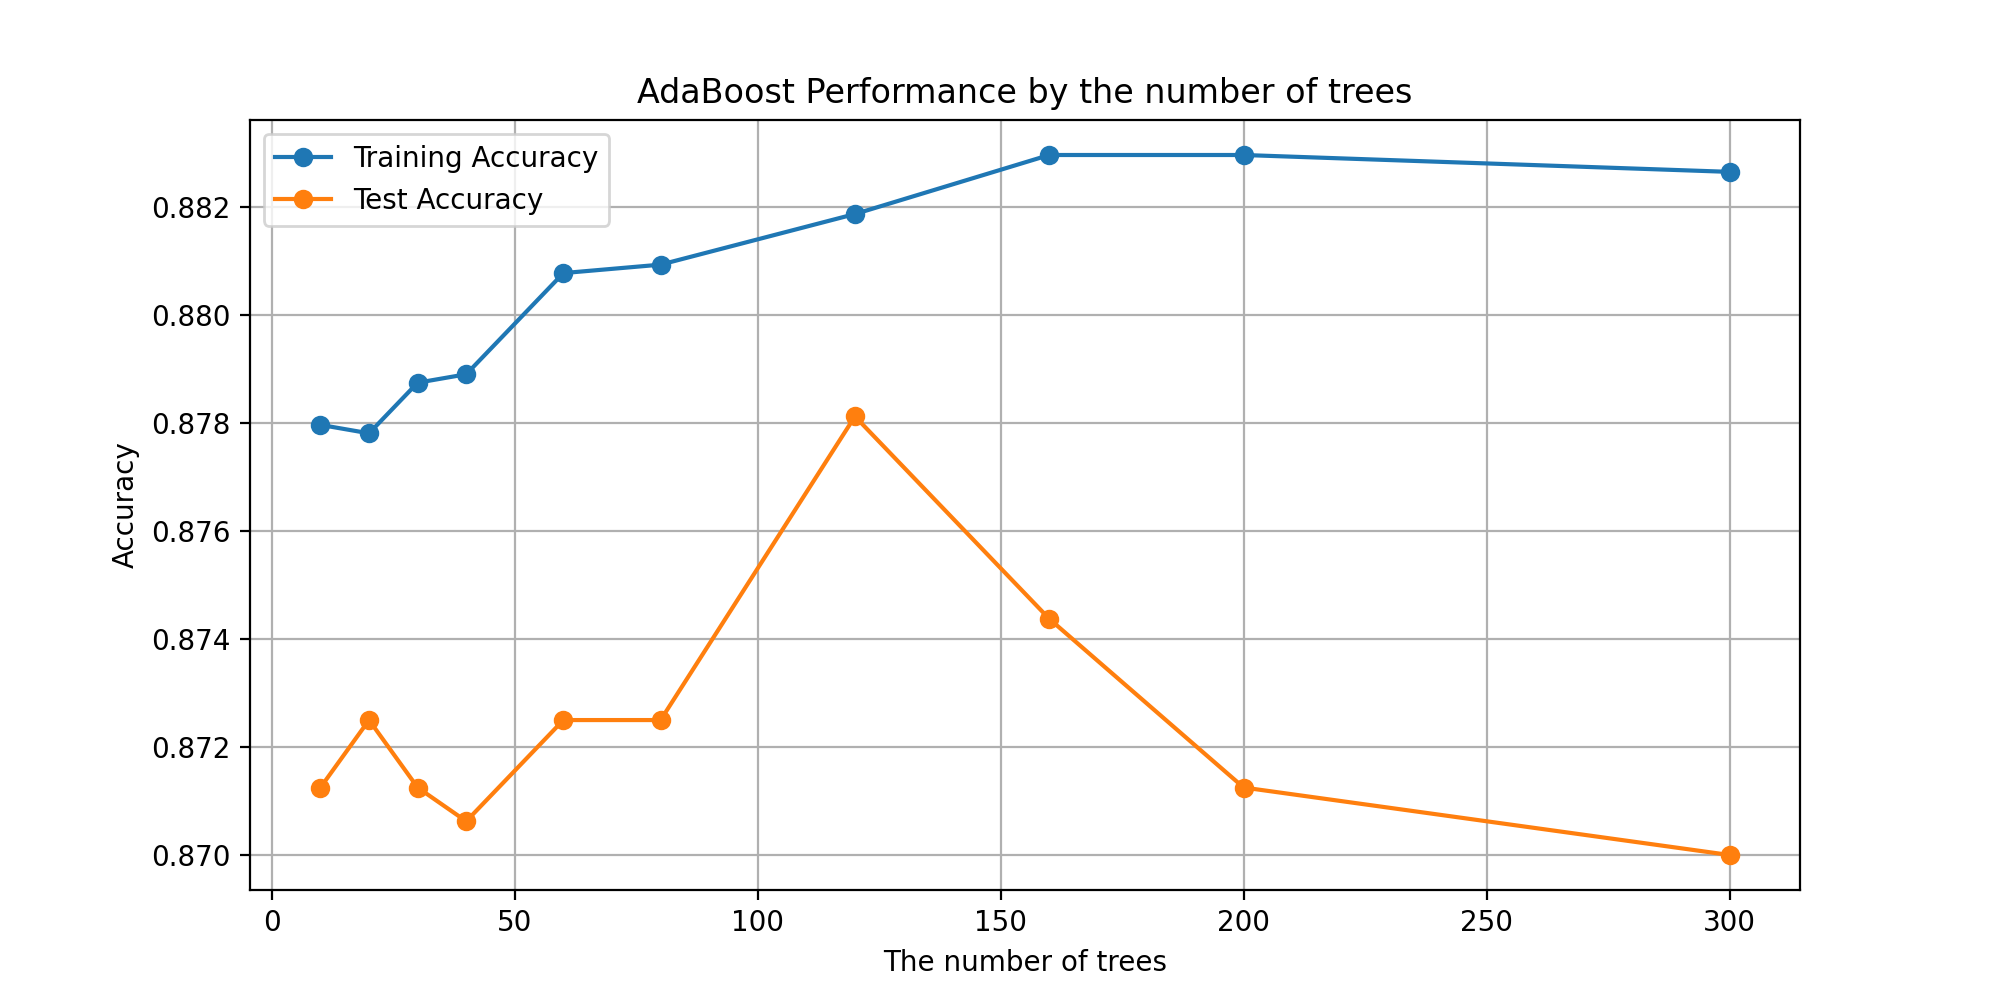

In [310]:
# num_trees = [10, 50, 100, 200, 300, 500, 700, 1000, 1300]
num_trees = [10, 20, 30, 40, 60, 80, 120, 160, 200, 300]
train_accuracies = []
test_accuracies = []

for n_estimators in num_trees:
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        algorithm="SAMME.R",
        learning_rate=0.1,
        random_state=42
    )
    ada_clf.fit(X_train, y_train)
    y_train_pred = ada_clf.predict(X_train)
    y_test_pred = ada_clf.predict(X_test)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    df_ntrees.loc[len(df_ntrees)] = 'Ada', n_estimators, train_accuracy, test_accuracy

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(num_trees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_trees, test_accuracies, label='Test Accuracy', marker='o')
plt.title('AdaBoost Performance by the number of trees')
plt.xlabel('The number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [311]:
df_ntrees

,type,number,train_accuracy,test_accuracy
0,Ada,10,0.877969,0.871250
1,Ada,20,0.877812,0.872500
2,Ada,30,0.878750,0.871250
3,Ada,40,0.878906,0.870625
4,Ada,60,0.880781,0.872500
5,Ada,80,0.880938,0.872500
6,Ada,120,0.881875,0.878125
7,Ada,160,0.882969,0.874375
8,Ada,200,0.882969,0.871250
9,Ada,300,0.882656,0.870000


*Then the Gradient boosting*

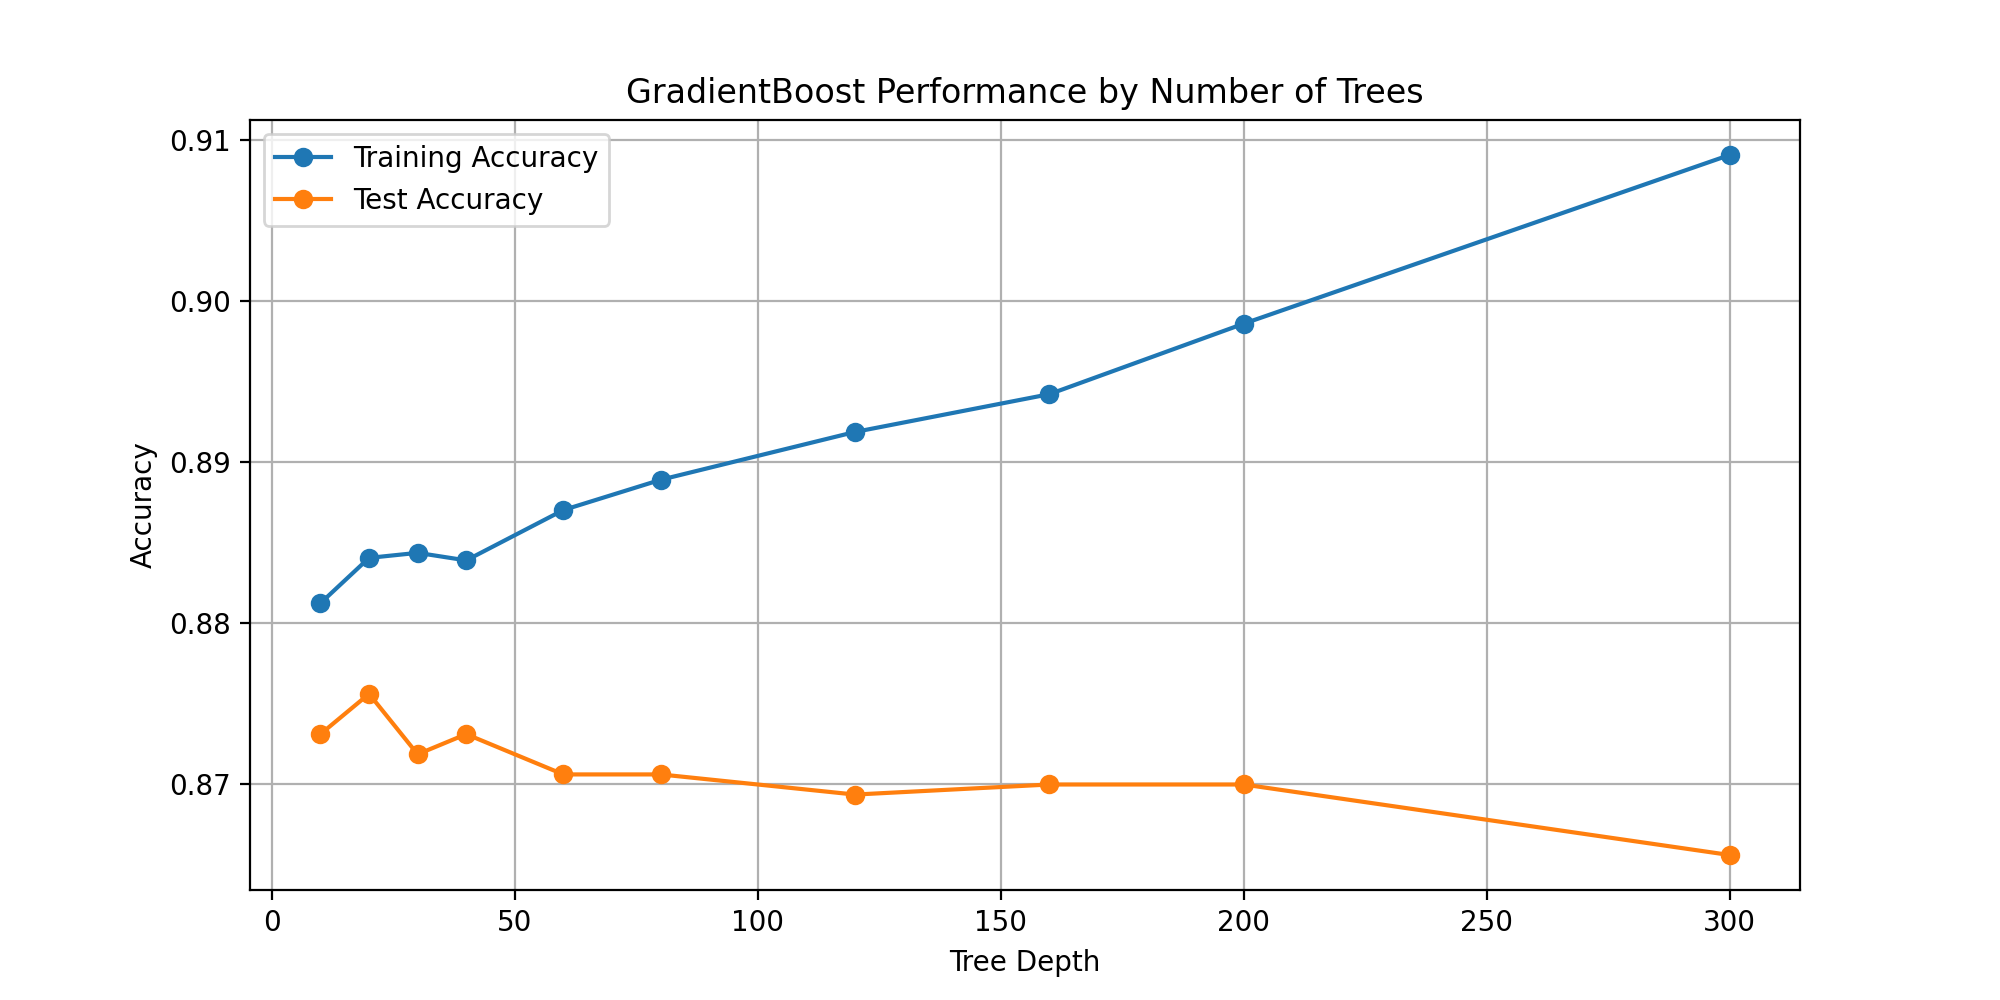

In [312]:
# num_trees = [10, 50, 100, 200, 300, 350, 400]
num_trees = [10, 20, 30, 40, 60, 80, 120, 160, 200, 300]
train_accuracies = []
test_accuracies = []

for n_estimators in num_trees:
    gd_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators = n_estimators, random_state=42)
    gd_clf.fit(X_train, y_train)
    y_train_pred = gd_clf.predict(X_train)
    y_test_pred = gd_clf.predict(X_test)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    df_ntrees.loc[len(df_ntrees)] = 'Gradient', n_estimators, train_accuracy, test_accuracy

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(num_trees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_trees, test_accuracies, label='Test Accuracy', marker='o')
plt.title('GradientBoost Performance by Number of Trees')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [313]:
df_ntrees

,type,number,train_accuracy,test_accuracy
0,Ada,10,0.877969,0.871250
1,Ada,20,0.877812,0.872500
2,Ada,30,0.878750,0.871250
3,Ada,40,0.878906,0.870625
4,Ada,60,0.880781,0.872500
5,Ada,80,0.880938,0.872500
6,Ada,120,0.881875,0.878125
7,Ada,160,0.882969,0.874375
8,Ada,200,0.882969,0.871250
9,Ada,300,0.882656,0.870000


*Lets ggplot now.*

In [314]:
df_ntrees2 = pd.melt(df_ntrees, id_vars=["type", 'number'], value_vars=["train_accuracy", 'test_accuracy'])
df_ntrees2

,type,number,variable,value
0,Ada,10,train_accuracy,0.877969
1,Ada,20,train_accuracy,0.877812
2,Ada,30,train_accuracy,0.878750
3,Ada,40,train_accuracy,0.878906
4,Ada,60,train_accuracy,0.880781
5,Ada,80,train_accuracy,0.880938
6,Ada,120,train_accuracy,0.881875
7,Ada,160,train_accuracy,0.882969
8,Ada,200,train_accuracy,0.882969
9,Ada,300,train_accuracy,0.882656


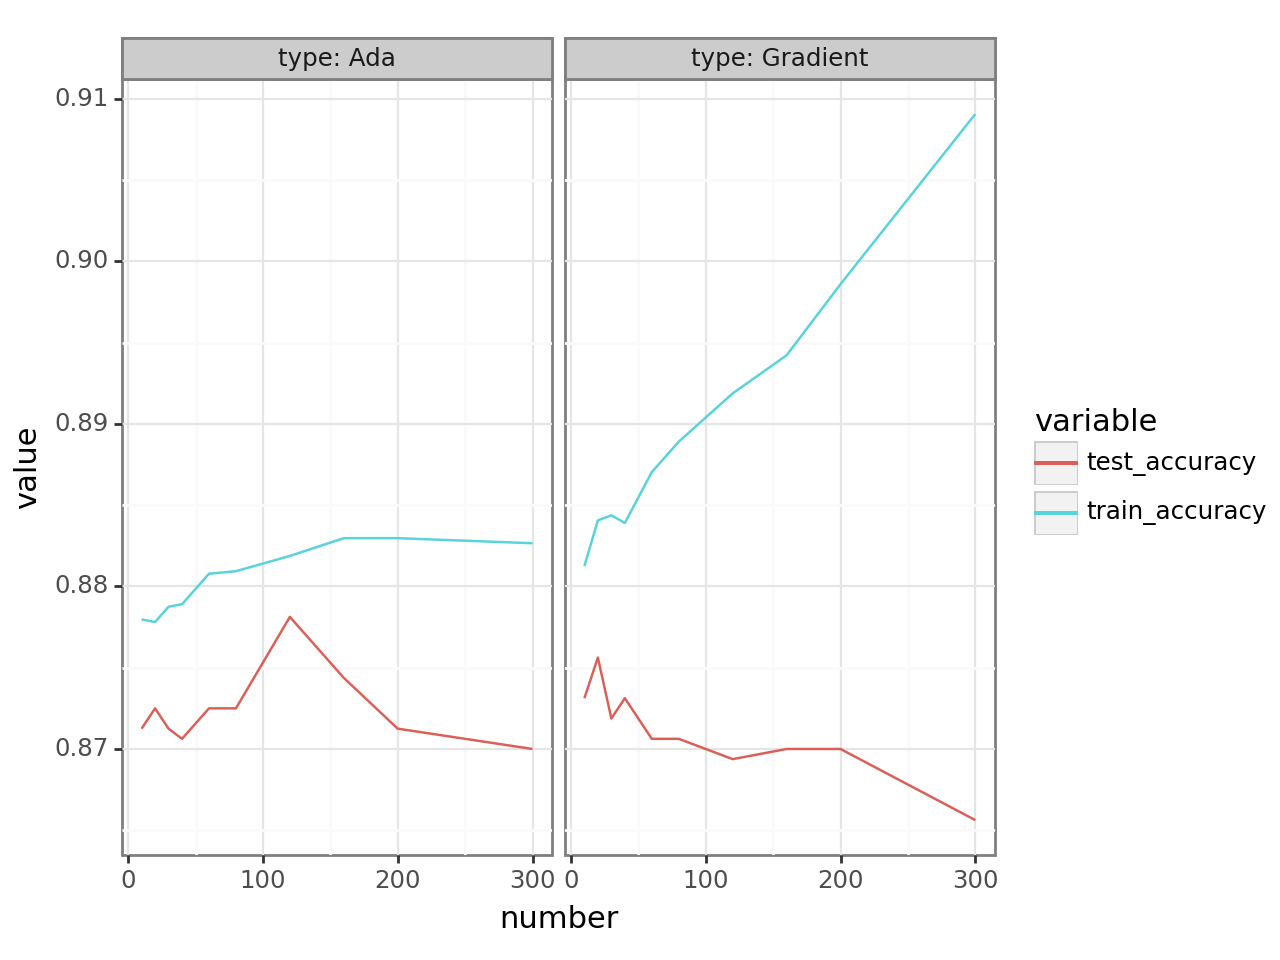

<Figure Size: (640 x 480)>

In [315]:
p1 = (ggplot(df_ntrees2, aes(x = 'number', y = 'value', color = 'variable'))
      + geom_line()
      + facet_wrap('type', nrow = 1, labeller="label_both")
      + theme_minimal()
      + theme_bw()
      )
p1

#### Then lets check the depth

In [316]:
df_depth = pd.DataFrame(columns=['type', 'depth', 'train_accuracy', 'test_accuracy'])
df_depth

,type,depth,train_accuracy,test_accuracy


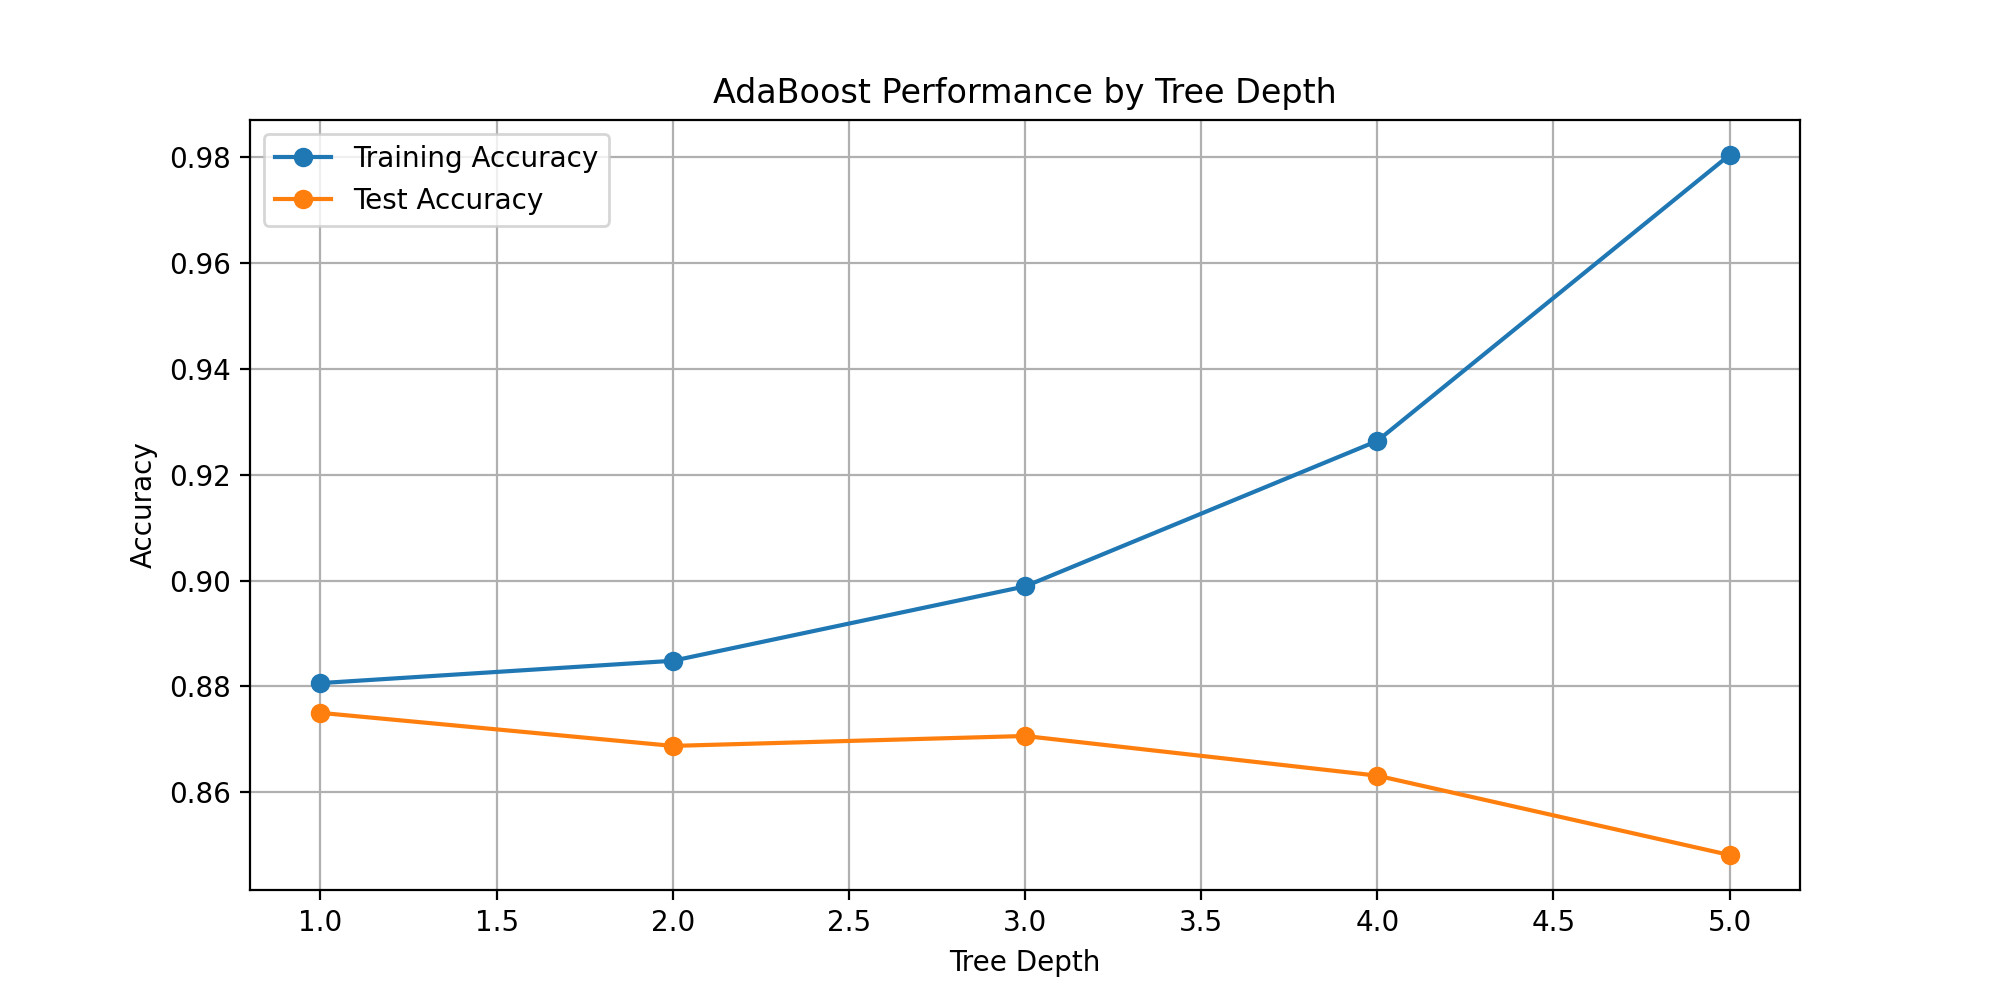

In [317]:
tree_depths = [1, 2, 3, 4, 5]
train_accuracies = []
test_accuracies = []

for depth in tree_depths:
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=depth),
        n_estimators=100,
        algorithm="SAMME.R",
        learning_rate=0.1,
        random_state=42
    )
    ada_clf.fit(X_train, y_train)
    y_train_pred = ada_clf.predict(X_train)
    y_test_pred = ada_clf.predict(X_test)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    df_depth.loc[len(df_depth)] = 'Ada', depth, train_accuracy, test_accuracy

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(tree_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title('AdaBoost Performance by Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

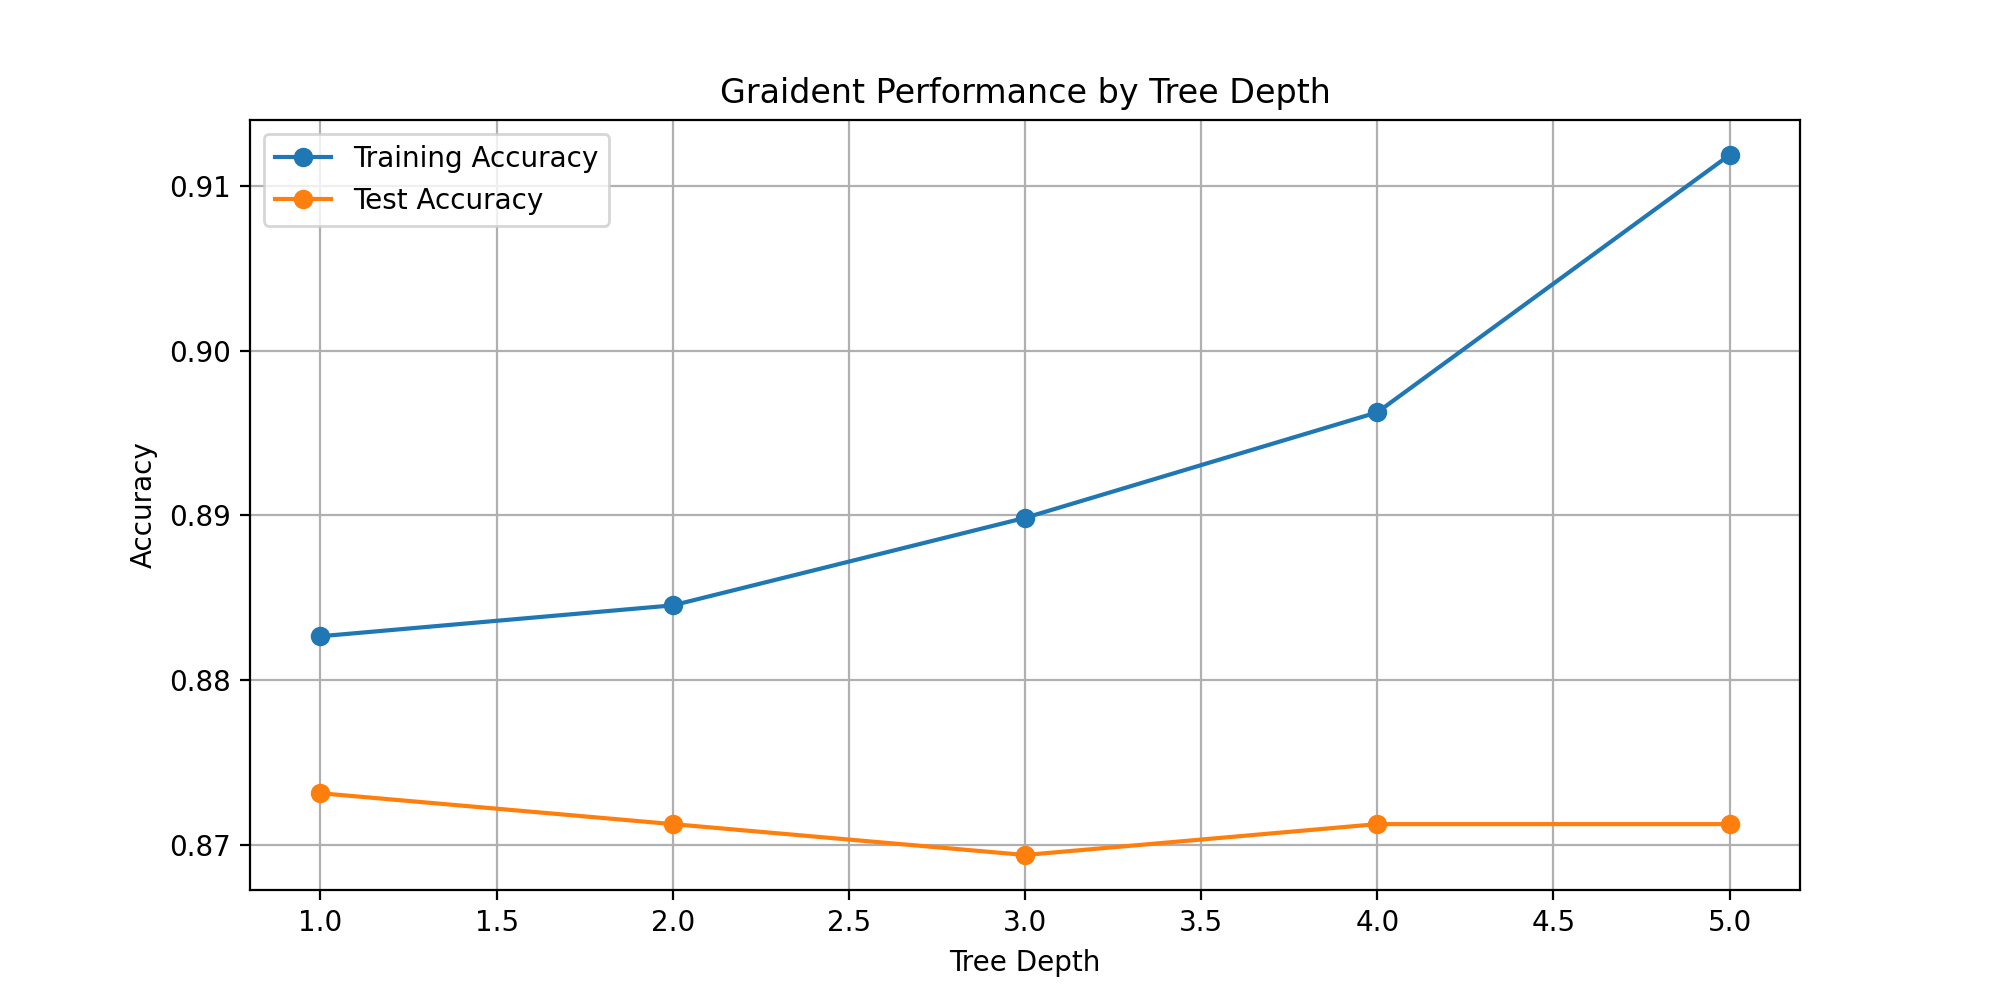

In [318]:
tree_depths = [1, 2, 3, 4, 5]
train_accuracies = []
test_accuracies = []

for depth in tree_depths:
    gd_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth = depth, n_estimators = 100, random_state=42)
    gd_clf.fit(X_train, y_train)
    y_train_pred = gd_clf.predict(X_train)
    y_test_pred = gd_clf.predict(X_test)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    df_depth.loc[len(df_depth)] = 'Gradient', depth, train_accuracy, test_accuracy

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(tree_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Graident Performance by Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [319]:
df_depth

,type,depth,train_accuracy,test_accuracy
0,Ada,1,0.880625,0.875000
1,Ada,2,0.884844,0.868750
2,Ada,3,0.898906,0.870625
3,Ada,4,0.926406,0.863125
4,Ada,5,0.980469,0.848125
5,Gradient,1,0.882656,0.873125
6,Gradient,2,0.884531,0.871250
7,Gradient,3,0.889844,0.869375
8,Gradient,4,0.896250,0.871250
9,Gradient,5,0.911875,0.871250


In [320]:
df_depth2 = pd.melt(df_depth, id_vars=["type", 'depth'], value_vars=["train_accuracy", 'test_accuracy'])
df_depth2

,type,depth,variable,value
0,Ada,1,train_accuracy,0.880625
1,Ada,2,train_accuracy,0.884844
2,Ada,3,train_accuracy,0.898906
3,Ada,4,train_accuracy,0.926406
4,Ada,5,train_accuracy,0.980469
5,Gradient,1,train_accuracy,0.882656
6,Gradient,2,train_accuracy,0.884531
7,Gradient,3,train_accuracy,0.889844
8,Gradient,4,train_accuracy,0.896250
9,Gradient,5,train_accuracy,0.911875


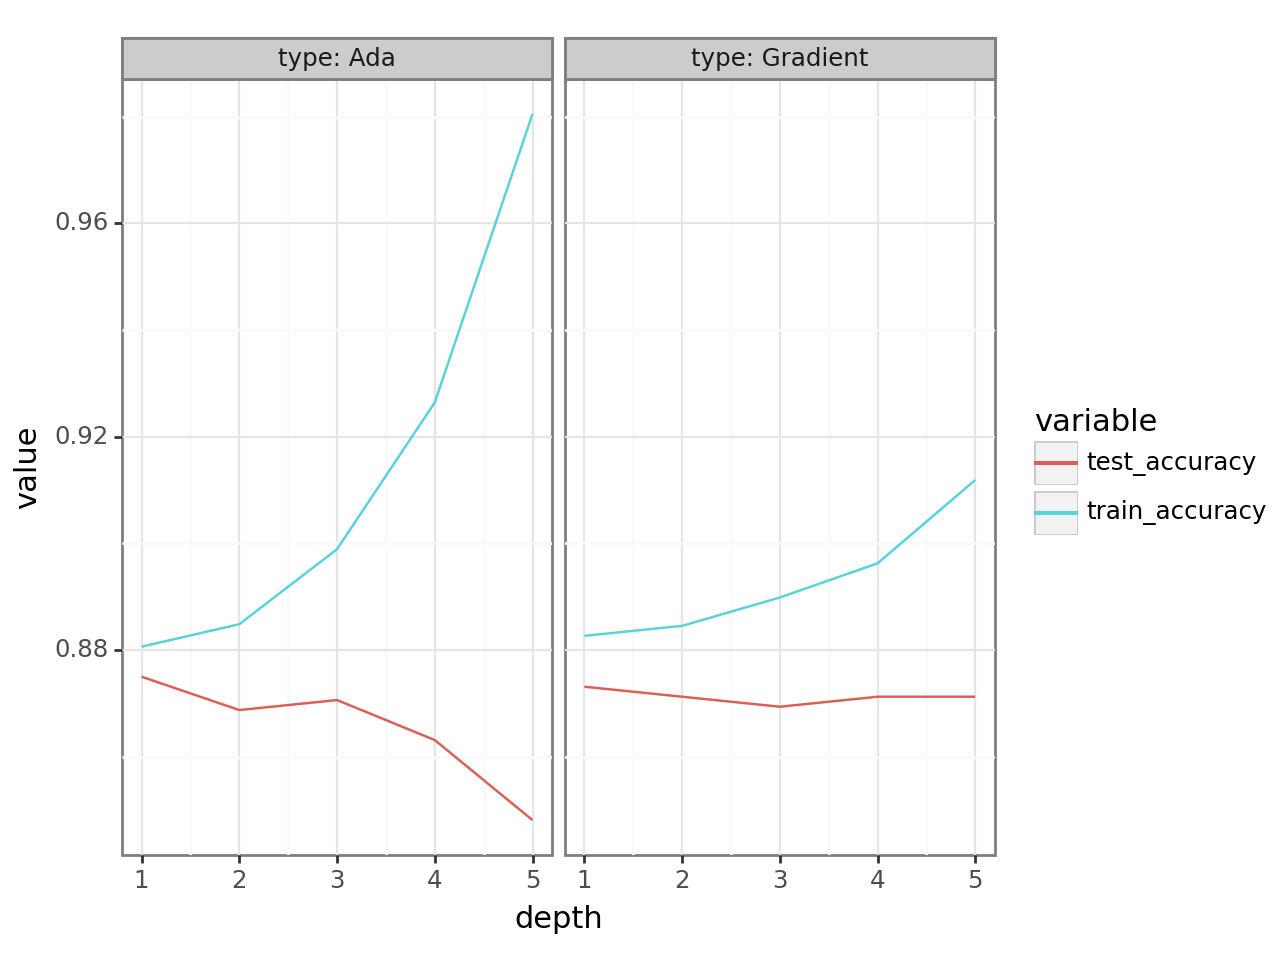

<Figure Size: (640 x 480)>

In [321]:
p2 = (ggplot(df_depth2, aes(x = 'depth', y = 'value', color = 'variable'))
      + geom_line()
      + facet_wrap('type', nrow = 1, labeller="label_both")
      + theme_minimal()
      + theme_bw()
      )
p2